# Investigating the Travelling Salesperson problem and the Tacoma Bridge collapse


### *Importing necessary modules*

In [1]:
import numpy as np  
import numpy.random as random  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import random
import copy
%matplotlib inline

### *Python Version* 

In [2]:
import sys
import matplotlib 
print("Python version: {}".format(sys.version))
print("Matplotlib version: {}".format(matplotlib.__version__))

Python version: 3.5.0 (default, Sep 13 2015, 23:30:27) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.56)]
Matplotlib version: 1.4.3


## Abstract 
In this report, the Travelling Salesperson problem and Tacoma Bridge collapse was investigated. The Travelling Salesperson used simulated annealing algorithm to find the shortest path distance between 30 cities. The shortest path found was 2194.6483. The Tacoma Bridge collapse was modelled using a set of differetial equations. These equations were then solved using the Taylor method and the Cromer method. The driven wind force was introduced to the differential equations which meant the natural frequency of the bridge could be found. This was found to be 0.12Hz.



## Introduction 
This report aims to investigate 2 optimisation problems. These problems are commonly known as the Tacoma Bridge collapse and the Travelling Salesperson problem. The Travelling Salesperson is categorised as NP-hard. NP hardness is used in computational theory to define a property of a class of problems. A problem is defined as NP-hard if an algorithm for solving it can also be used to solve any NP-problem. Therefore, NP-hard is at least if not harder than any NP-problem [NP-hard problem].

The Tacoma Bridge collapse occurred in November 1940 [Tacoma Narrows Bridge collapses 2009], only a short while after its opening; it was the third largest suspension bridge at the time. The bridge was constructed in a non-typical fashion, it used two narrow plate girders to stiffen the deck instead of using the traditional approach of trusses. It was clear from the beginning that the bridge was too flexible, even in moderate winds. The collapse of the bridge was primarily caused by the phenomenon known as resonance. Resonance is when a periodic force becomes in phase with the natural frequency of a system. These periodic forces add up to large oscillations over a period of time. In this case for the Tacoma Bridge collapse, the driving force comes from the phenoma known as vortex shedding and aerodynamic flutter. This is where a fluid, such as air, moving past an object oscillates, producing vortices behind the object. This causes zones of low pressure, and when these occur at frequencies close to the natural frequency of the bridge, small amounts of wind can cause large oscillations. Any amount of twisting in the bridge creates areas of low pressure/ vortices which amplify the twisting motion. This is a self-induced oscillation at a definite frequency where energy is exctracted from the wind driving force by the motion of the structure [Bond, 2022]. 

The motion of the collapse of the Tacoma Bridge can be modelled using a set of differential equations. These equations can be solved computaionally using the Taylor and Cromer method. The motion is first modelled without the addition of a driving force and then later, wind is introduced to model a more accurate representation of the collapse. From these models, we are able to determine the natural frequency of the bridge by finding the greatest vertical displacement and its corresponding rotational frequency. The natural frequency of the bridge was stated to be 0.2Hz [Tacoma Narrows Bridge Failure].

The Travelling Salesperson problem was first studied in the 1920s by an economist and mathematican by the name of Karl Menger [Cummings, 2000]. It was a previously known as the 'messenger problem' and was defined as the task of finding the shortest distance for a known path which had a finite number of points. The TSP is categorised as a NP-hard problem which means it cannot be solved in polynomial time. For further clarification, this means if the computation time is greater than a polnomial function of the input size, it cannot be solved in polynomial time. This project aims to find the shortest path possible for 30 capital cities in America.

Firstly, a random path is generated for 'n' number of cities. Then, a function to compute a pairwise exchange is made in order to shuffle the order of the cities created in the random path so that we can compare the path lengths for the original path and the new pairwise exchange path. The method of simulated annealing is used to determine whether the new path should be accepted or rejected. Finally, the shortest path can be found by creating an optimal function that consists of the functions mentioned above. 


### Problem 1: The Tacoma Bridge 
In this problem, we use a set of differential equations to model the oscillations that lead up to the collapse of the Tacoma Bridge. First, the oscillations are modelled without any consideration of wind. Then wind is accounted for and we investigate how varying parameters such as the amplitude and frequency effect the motion of the bridge.

Cables hold tight when extened, however, lose resistance when compressed, therefore, Hooke's law for a conventional spring cannot be used to model the tension force. Instead, Mckenna's model [McKenna and C.O Tuama] is used and is as follows:
$$ f(y) = \frac{K}{a} (e^{ay}-1) \tag1$$


By using trigonometry as well as Euler's equation of motion for a rigid body and taking into account the moment of inertia along with the tension force, the following differential equations are achieved. 

$$ \frac{d^{2}y}{dt^{2}} = -d \times \frac{dy}{dt} - \frac{K}{ma}(e^{a(y - l\sin{(\theta)})} + e^{a(y + l\sin{(\theta)})} -2) \tag2$$

$$\frac{d^{2}\theta}{dt^{2}} = -d \times \frac{d\theta}{dt} +\frac{3\cos{(\theta)}}{l}\frac{K}{ma}(e^{a(y - l\sin{(\theta)})} - e^{a(y + l\sin{(\theta)})}) \tag3$$




These differential equations would be extremly hard to solve analytically so the taylor and cromer method is used to computationally solve them. 


In order to solve these differential equations we need to define a few equations: $$\frac{dy}{dt} = z \tag4$$ 

$$\frac{d\theta}{dt} = \gamma$$ therefore $$\frac{dz}{dt} = -d \times \frac{dy}{dt} - \frac{K}{ma}(e^{a(y - l\sin{(\theta)})} + e^{a(y + l\sin{(\theta)})} -2) \tag5$$

and 

$$\frac{d\gamma}{dt} = -d \times \frac{d\theta}{dt} +\frac{3\cos{(\theta)}}{l}\frac{K}{ma}(e^{a(y - l\sin{(\theta)})} - e^{a(y + l\sin{(\theta)})}) \tag6$$

This is useful because instead of solving 2 second order differential equations, we are now solving equations of the first order. 

### Taylor and Cromer method 
The Taylor method, also known as the Euler method, uses the current position of the system to calculate the next postion. The Cromer method on the other hand, uses a mix of the current and later positions in order to determine the postion of the system at later time. The Taylor method is defined as explicit while the Cromer method is semi-explicit [Euler-cromer method]. The equations used to approximate the solution is as follows:

$$\text{Taylor method}$$

$$\theta_{n+1} = \theta_{n} + dt \cdot \gamma_{n} \tag7$$

$$y_{n+1} = y_{n} + dt \cdot z_{n} \tag8$$


$$\text{Cromer Method} $$

$$\theta_{n+1} = \theta_{n} + dt \cdot \gamma_{n+1} \tag9$$

$$y_{n+1} = y_{n} + dt \cdot z_{n+1} \tag{10}$$

The Cromer method is a faster and more effecient method compared to the Taylor method due to the fact that it only works with first order differential equations however, this also means it tends to be less accurate. Althougth Taylor method is more accurate, it usually has a longer run time due to the higher order derivatives being calculated. 

##### Initial parameters

In [3]:
tstart=0
tend=200


d=0.01
a=0.1
M=2500
K=1000
l=12

d = Friction Coefficient

a = Force Parameter 

M = Mass of the bridge

K = Spring constant

l = width of the bridge 

#### Defining functions for z and gamma:
Defining the functions beforehand makes the functions created later cleaner and easier to interpret.

In [4]:
def dz(z,y,θ):
    return -d * z - (K / (M * a)) * (np.exp(a * (y - l * np.sin(θ))) + np.exp(a * (y + l * np.sin(θ))) -2)
    

def dg (γ, θ, y):
    return -d * γ + ((3 * np.cos(θ) * K)/(l *M * a)) * (np.exp(a * (y - l*np.sin(θ))) - np.exp(a*(y + l * np.sin(θ))))

#### Solving the differential

In [5]:
def tacoma(dt=0.01, cromer=False, y0=0, θ0=0, z0=0, γ0=0):

    # Create the variables to store the results
    times=np.arange(tstart, tend+dt, dt)  # Create the array of model times
    Nt=len(times)                         # Number of time-steps
    y=np.zeros(Nt)                   
    θ=np.zeros(Nt)                   
    z=np.zeros(Nt) 
    γ=np.zeros(Nt) 
    

    # Set the initial conditions
    
    y[0]= y0
    θ[0]=θ0
    z[0]=z0
    γ[0]=γ0
    

    # Loop over all of the times and integrate the model
    for n in range(Nt-1):

        γ[n+1]= γ[n] + (dg(γ[n], θ[n], y[n])) * dt

        z[n+1]=z[n] + (dz(z[n], y[n], θ[n])) * dt
        
               
        if cromer:
            θ[n+1] = θ[n] + dt * γ[n+1]

            y[n+1] = y[n] + dt * z[n+1]
        
                     
        else:
            θ[n+1]= θ[n] + dt * γ[n]

            y[n+1]= y[n] + dt * z[n]
    fig, ax = plt.subplots()
    ax.plot(times, θ, '-b', label='theta agaist time')
    ax.plot(times,y, '-r', label='y against theta')
    plt.legend()
    plt.title('cromer = {0}, theta0 = {1}'.format(cromer,θ0))
    plt.show()                                                                               
    return times, θ, y

The above fucntion models the oscilations of the bridge if no wind is present. 

#### Graphs with varying parameters 

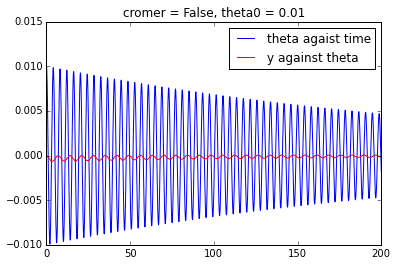

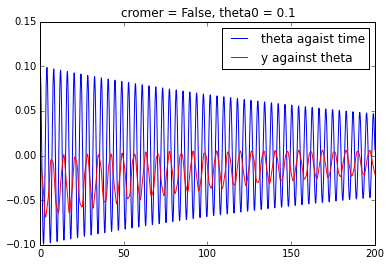

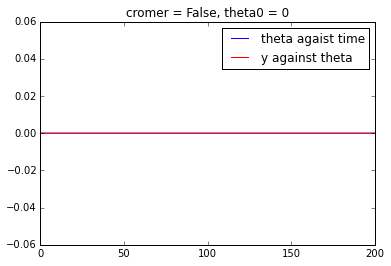

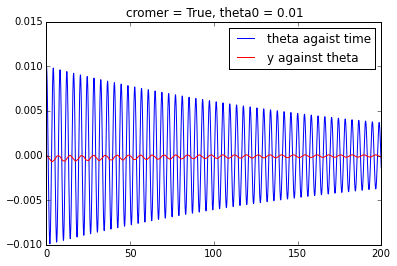

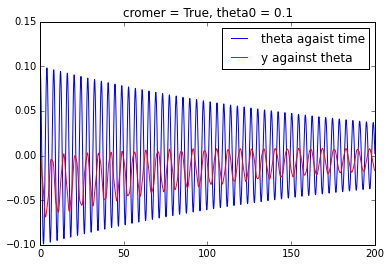

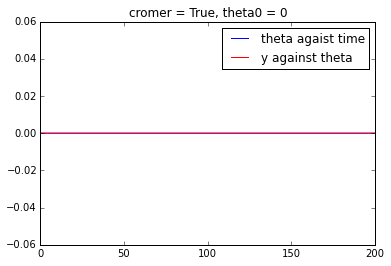

In [6]:
times, θ, y = tacoma(dt=0.001, cromer=False, y0=0, θ0=0.01, z0=0, γ0=0)

times, θ, y = tacoma(dt=0.001, cromer=False, y0=0, θ0=0.1, z0=0, γ0=0)

times, θ, y = tacoma(dt=0.001, cromer=False, y0=0, θ0=0, z0=0, γ0=0)

times, θ, y = tacoma(dt=0.001, cromer=True, y0=0, θ0=0.01, z0=0, γ0=0)

times, θ, y = tacoma(dt=0.001, cromer=True, y0=0, θ0=0.1, z0=0, γ0=0)

times, θ, y = tacoma(dt=0.001, cromer=True, y0=0, θ0=0, z0=0, γ0=0)


The graphs above compare the Cromer method to the Taylor method in order to verify whether these methods can be used to solve the coupled differential equations as well as establishing a baseline set of results to compare to. Both y and $\theta$ decrease over time in the absence of a driven force. This is expected as energy is dissipated over time.
The graphs for the corresponding parameters for each Taylor and Cromer method are more or less identical which would suggest that they were successful in solving the differential equations with the given parameters. 

#### Wind
Now that the method has been verified and a baseline has been established, the driving force of wind can be introduced to more accurately model the events that occured before the collapse of the Tacoma Bridge. This is simply done by adding an additional term to vertial component. The additional term is: 

$$A\sin(\omega t) \tag{11}$$

In [7]:
def wind_tacoma(dt=0.01, cromer=False, y0=0, θ0=0, z0=0, γ0=0, A=0, ω=0):
    
    # Create the variables to store the results
    times=np.arange(tstart, tend+dt, dt)  # Create the array of model times
    Nt=len(times)                         # Number of time-steps
    y=np.zeros(Nt)                   
    θ=np.zeros(Nt)                   
    z=np.zeros(Nt) 
    γ=np.zeros(Nt) 
    t=np.arange(tstart, tend+dt, dt)
    
    # Set the initial conditions
    
    y[0]=y0
    θ[0]=θ0
    z[0]=z0
    γ[0]=γ0
    

    for n in range(Nt-1):

        γ[n+1]= γ[n] + (dg(γ[n], θ[n], y[n])) * dt

        z[n+1]=z[n] + (dz(z[n], y[n], θ[n]) + A * np.sin(ω*t[n])) * dt 
# wind introduced by adding Asin(omega t ) to the z component
        
               
        if cromer:
            θ[n+1] = θ[n] + dt * γ[n+1]

            y[n+1] = y[n] + dt * z[n+1]
        
            
          
        else:
            θ[n+1]= θ[n] + dt * γ[n]

            y[n+1]= y[n] + dt * z[n]
                                                                                   
  
    return times, θ, y


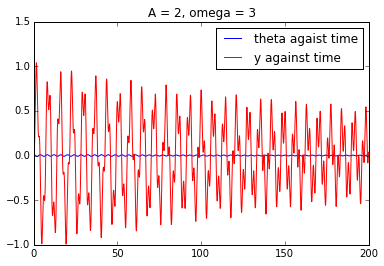

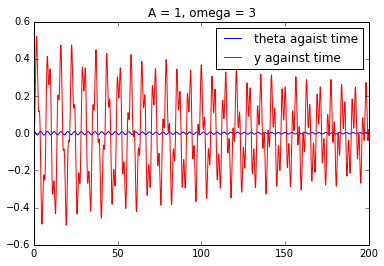

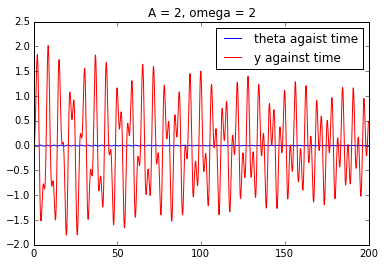

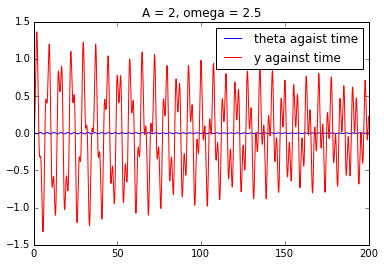

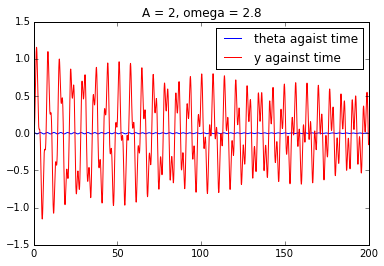

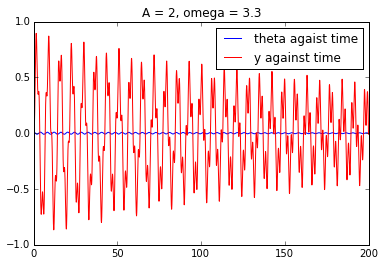

In [8]:
times, θ, y = wind_tacoma(dt=0.001, cromer=True, y0=0, θ0=0.01, z0=0, γ0=0, A=2, ω=3 )
fig, ax = plt.subplots()
ax.plot(times, θ, '-b', label='theta agaist time')
ax.plot(times,y, '-r', label='y against time')
plt.legend()
plt.title('A = 2, omega = 3')
plt.show()
  
times, θ, y = wind_tacoma(dt=0.001, cromer=True, y0=0, θ0=0.01, z0=0, γ0=0, A=1, ω=3 )
fig, ax = plt.subplots()
ax.plot(times, θ, '-b', label='theta agaist time')
ax.plot(times,y, '-r', label='y against time')
plt.legend()
plt.title('A = 1, omega = 3')
plt.show()

times, θ, y = wind_tacoma(dt=0.001, cromer=True, y0=0, θ0=0.01, z0=0, γ0=0, A=2, ω=2 )
fig, ax = plt.subplots()
ax.plot(times, θ, '-b', label='theta agaist time')
ax.plot(times,y, '-r', label='y against time')
plt.legend()
plt.title('A = 2, omega = 2')
plt.show()
          
times, θ, y = wind_tacoma(dt=0.001, cromer=True, y0=0, θ0=0.01, z0=0, γ0=0, A=2, ω=2.5 )
fig, ax = plt.subplots()
ax.plot(times, θ, '-b', label='theta agaist time')
ax.plot(times,y, '-r', label='y against time')
plt.legend()
plt.title('A = 2, omega = 2.5')
plt.show()
          
times, θ, y = wind_tacoma(dt=0.001, cromer=True, y0=0, θ0=0.01, z0=0, γ0=0, A=2, ω=2.8 )
fig, ax = plt.subplots()
ax.plot(times, θ, '-b', label='theta agaist time')
ax.plot(times,y, '-r', label='y against time')
plt.legend()
plt.title('A = 2, omega = 2.8')
plt.show()

times, θ, y = wind_tacoma(dt=0.001, cromer=True, y0=0, θ0=0.01, z0=0, γ0=0, A=2, ω=3.3 )
fig, ax = plt.subplots()
ax.plot(times, θ, '-b', label='theta agaist time')
ax.plot(times,y, '-r', label='y against time')
plt.legend()
plt.title('A = 2, omega = 3.3')
plt.show()

We can see from the graph that as the amplitude of the wind component increases, so does the vertical displacement. 



#### Investigation
Now we can determine the natural frequency of the bridge by varying  $\omega$ and plotting a graph of $\theta$ against y and locating which value of $\omega$ produces the greatest displacement in y.

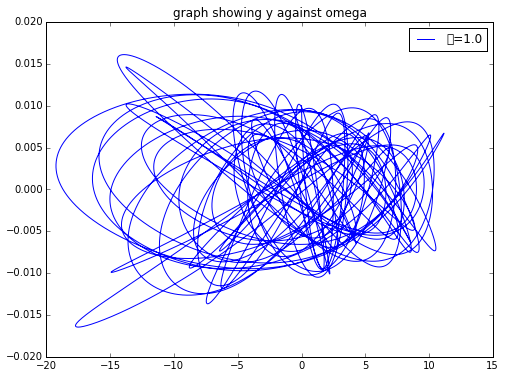

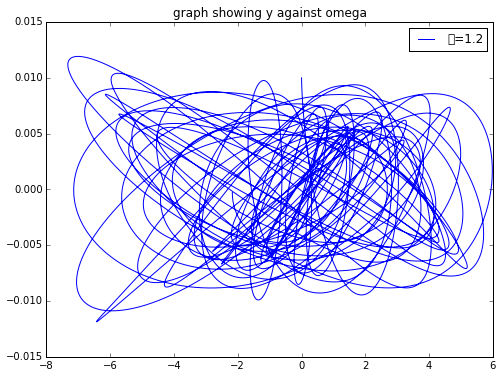

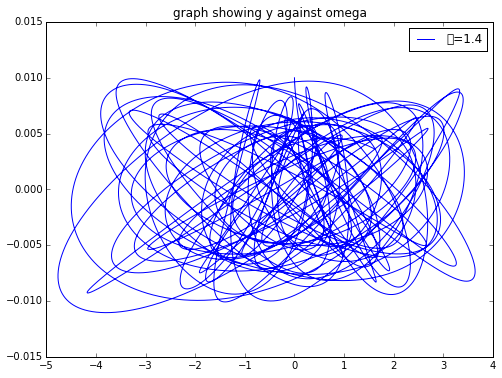

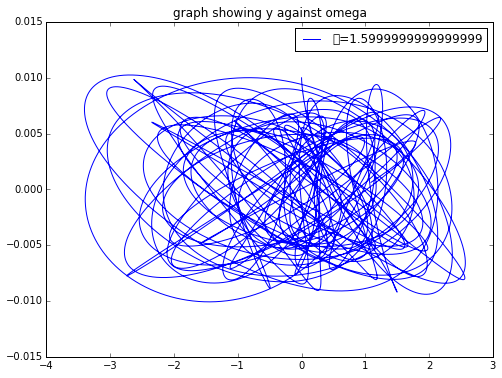

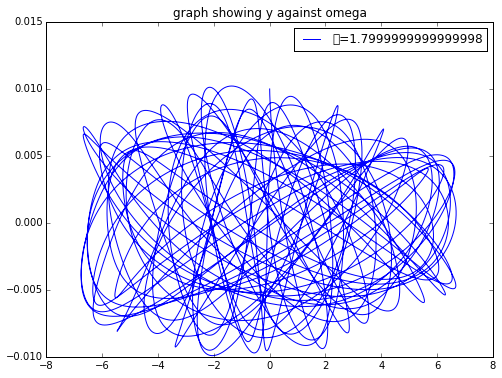

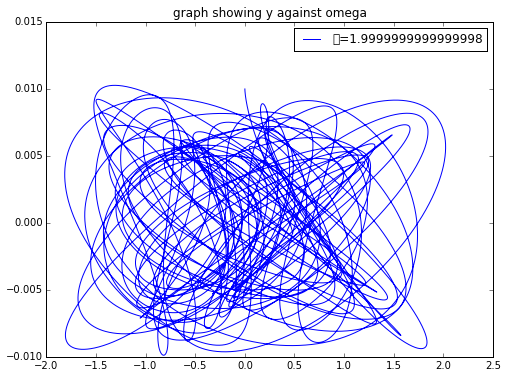

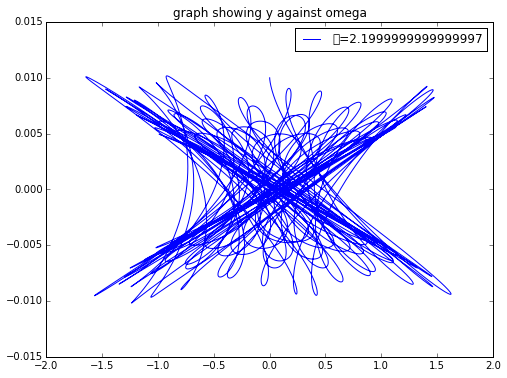

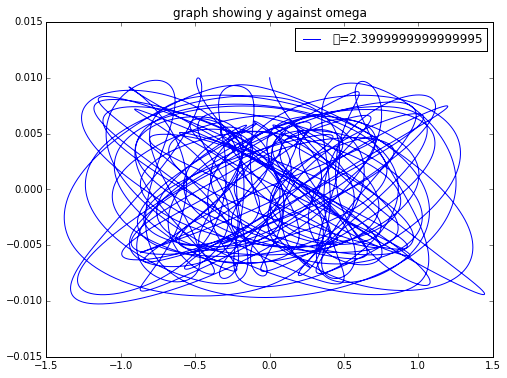

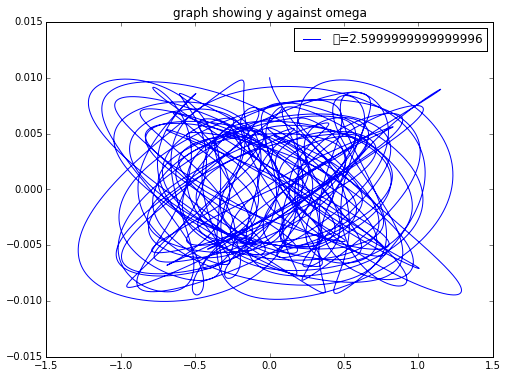

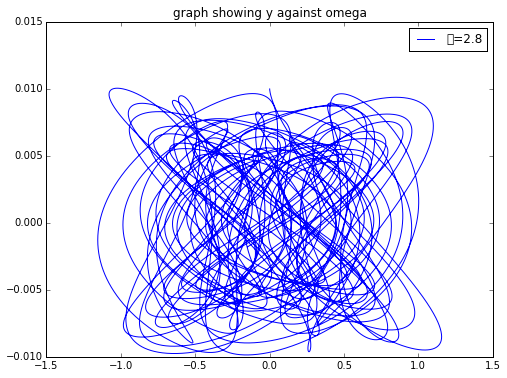

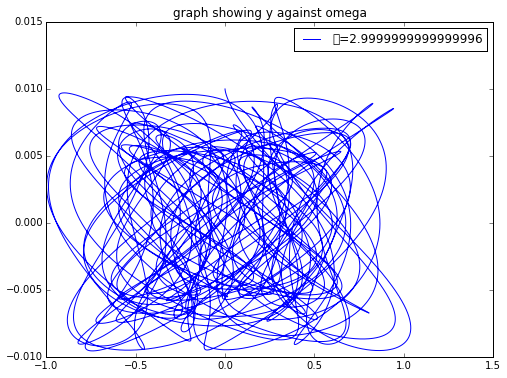

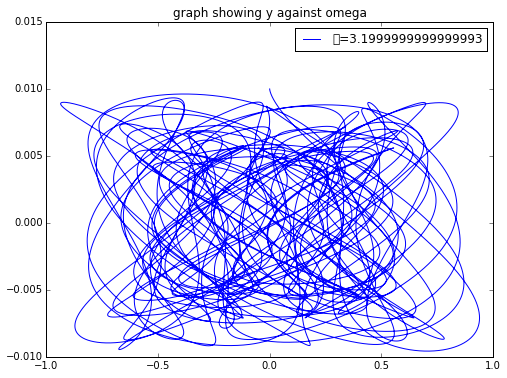

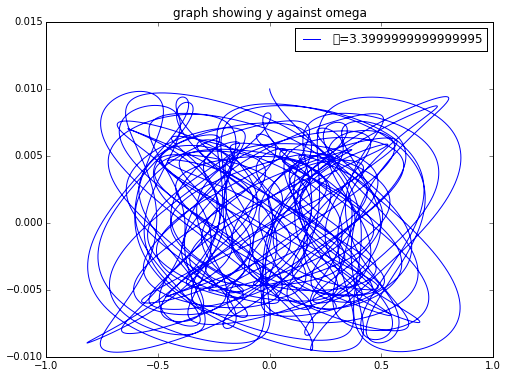

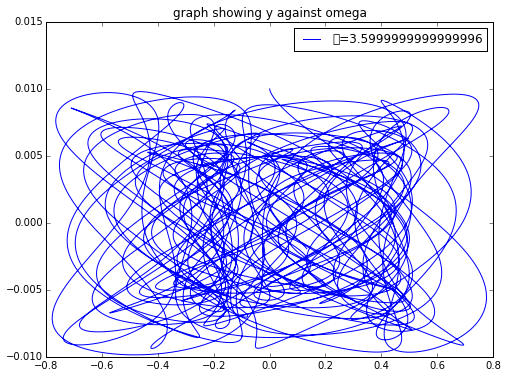

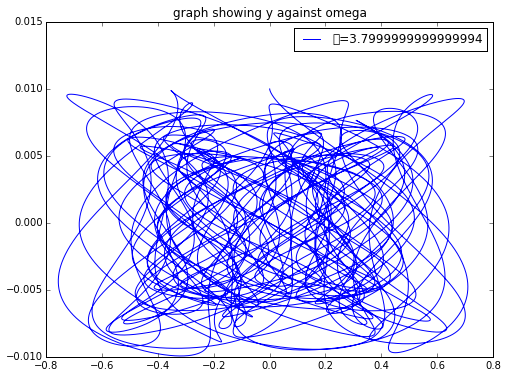

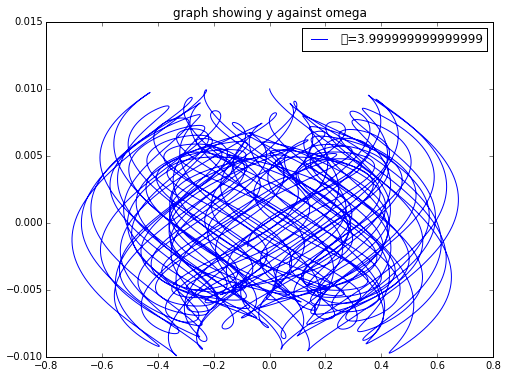

In [9]:
ω_start=1
ω_end=4.2
ω=np.arange(ω_start, ω_end, 0.2)

for i in ω:
    times, θ, y = wind_tacoma(dt=0.001, cromer=False, y0=0, θ0=0.01, z0=0, γ0=0, A=2, ω=i )
    figure(figsize=(8,6),dpi=80)
    plt.plot(y,θ , '-b', label='ω={0}'.format(i))
    plt.xlabel('')
    plt.ylabel('')
    plt.title('graph showing y against omega')
    plt.legend()
    plt.show()

From the graphs above, we can see that the greatest y displacement occurs when $\omega$ is around 1. This means we can repeat the process with $\omega$ ranging from 0.9 - 1.1 to find a more accurate natural frequency.

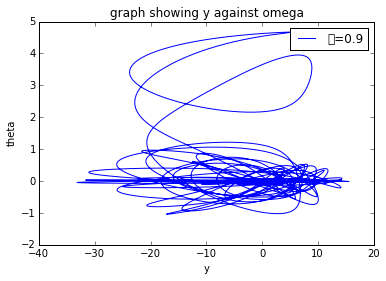

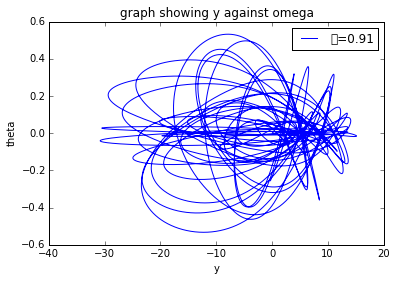

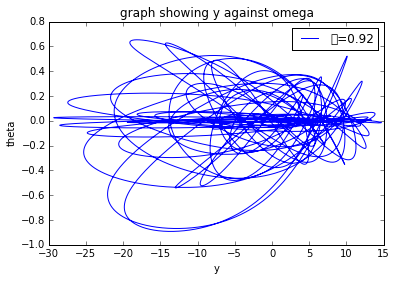

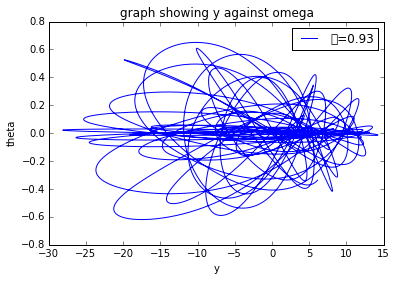

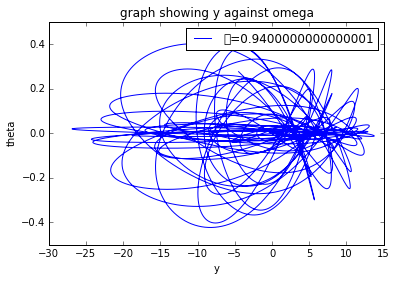

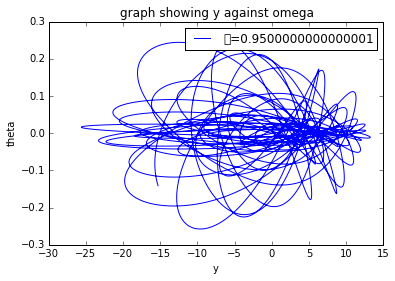

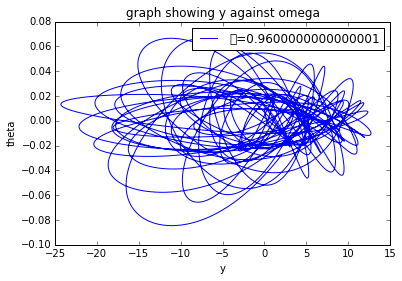

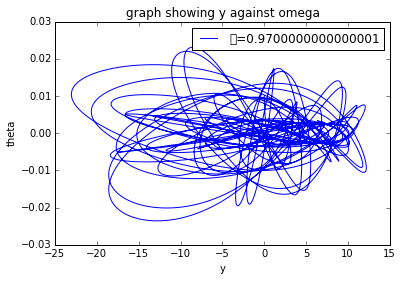

KeyboardInterrupt: 

In [10]:
ω_start=0.9
ω_end=1.1
ω=np.arange(ω_start, ω_end, 0.01)

for i in ω:
    times, θ, y = wind_tacoma(dt=0.001, cromer=False, y0=0, θ0=0.01, z0=0, γ0=0, A=2, ω=i )
    plt.plot( y, θ, label='ω={0}'.format(i))
    plt.xlabel('y')
    plt.ylabel('theta')
    plt.title('graph showing y against omega')
    plt.legend()
    
    
    plt.show()

Try again with $\omega $ in the range of 0.7 - 0.9

In [ ]:
ω_start=0.7
ω_end=0.9
ω=np.arange(ω_start, ω_end, 0.01)

for i in ω:
    times, θ, y = wind_tacoma(dt=0.001, cromer=True, y0=0, θ0=0.01, z0=0, γ0=0, A=2, ω=i )
    plt.plot( y, θ, label='ω={0}'.format(i))
    plt.xlabel('y')
    plt.ylabel('theta')
    plt.title('graph showing y against omega')
    plt.legend()
    
    
    plt.show()

In [ ]:
import numpy as np

fig, ax = plt.subplots()

ω_start=0.7
ω_end=1
ω=np.arange(ω_start, ω_end, 0.03)
    
for i in ω:
    times, θ, y = wind_tacoma(dt=0.001, cromer=True, y0=0, θ0=0.01, z0=0, γ0=0, A=2, ω=i )
    ax.plot( y,θ, label='{0}'.format(i))
    ax.set_xlabel('y')
    ax.set_ylabel('Theta')
    ax.set_title('graph showing theta against y')
    
 
plt.rcParams['figure.figsize']=[10,10]

ax.legend(loc='right', bbox_to_anchor=(1.4, 0.5))
plt.show();

The graphs above clearly highlights that the largest displacement in $y$ occurs when $ \omega  = 0.73$.

Using the following equation: $$\omega = 2 \pi \nu \tag{12}$$ 

the natural frequency of the bridge can established. The natural frequency of the bridge which is achieved from this investigation is 0.12Hz.

### Other occurences of similar behaviour

##### Millennium bridge 
On opening day, the millennium bridge showed similar occurences to the Tacoma bridge but for slightly different reasons. The bridge opened on June 10th 2000 and straight away, thousands of people were crossing it [Explaining why the millennium bridge wobbled- Cornell University  2005]. At first there was no signs of motion in the bridge, but then slowly, the bridge started to sway and oscillate which gradually intensified. The pedestrians on the bridge began to walk in unison in order to keep their balance and combat the swaying of the bridge. This accidental synchronisation of the steps of the pedestrians was what caused this intensifying of the swaying. The difference between the Millennium bridge incident and Tacoma bridge is that the cause of the collapse of Tacoma bridge was due to the vertical oscilations of the bridge while the Millenium bridge swayed in the lateral plane. 

#### Broughton Suspension bridge 
On the 12th of April 1831, the Broughton Suspension bridge collapsed due to mechanical resonance induced by soldiers marching across [Tietz, 2020]. The synchronisation of the marching troops induced a vertical force causing one of the iron columns supporting the suspension bridge to fall. After this incident, it was ordered by the British Army to 'break step' when soldiers were marching across a bridge. 

## Problem 2: The Travelling Salesperson

The Travelling Salesperson problem aims to optimise the path a person is meant to take in order to complete it in the shortest distance possible. Finding this by hand is challenging as there are n! number of combination for 'n' number of cities were n! can be calculated using the equation: 

$$ n! = n \times (n-1) \times (n-2) \times ... (n- (n-1)) \tag{14}$$
Then each path must be drawn out and compared to one another to find which combination creates the shortest path length.

Therefore, for just 8 cities there are 40320 different path combinations and for 30 cities, there are $2.652528598 \times 10^{32}$ different paths. It is clear from this that it is impossible for the problem to be solved by using such a brute force method. Therefore, a different approach must be implemented. 
#### Simulated annealing 
Simulated annealing is a common method for optimization problems. It is used to find a global minima when local minima are present. It models the physical process of heating and then slowly lowering the temperature to decrease defects. The algorithn is essentially 'hill climbing' but instead of picking the best move, it picks a random move based on a probability distribution. If the selected move improves the solution, then it is always accpeted, however, a move that does not improve the solution can still be accpeted. This is useful as it helps to avoid falling into a local minima. A temperature schedule is used to systematically decrease the temperature as the algorithm of the simulated annealing process runs. Therefore, the new path is accepted/rejected depending on a probability distribution which is proportional to the temperature [Baird]. The probability distribution is given by the equation: $$P = e^{\frac{-d_{new}}{T}} \dot e^{\frac{d_{old}}{T}} \tag{15}$$ 



In [11]:
import json
import copy 

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

map = mpimg.imread("map.png")  

In [12]:
with open('capitals.json', 'r') as capitals_file:
    capitals = json.load(capitals_file)
    
    
capitals_list = list(capitals.items())

capitals_list = [(c[0], tuple(c[1])) for c in capitals_list]


In [13]:
def coords(path):
        _, coords = zip(*path)
        return coords
    
def show_path(path_, starting_city):

    path=coords(path_) 
    x, y = list(zip(*path))
    
    _, (x0, y0) = starting_city
    
    plt.imshow(map)
    plt.plot(x0, y0, 'y*', markersize=15) 
    plt.plot(x + x[:1], y + y[:1])  
    plt.axis("off")
    fig = plt.gcf()
    fig.figure=((10,10))
    plt.show()

The functions above were given beforehand.

#### Temperature Schedule 
A temperature schedule is used to systematically decrease the temperature as the algorithm of the simulated annealing process runs. The purpose of this is to prevent the algorithm from converging to a local minima. This is given by the equation: 

$$Temp = \alpha^{t} t_{0} \tag{13}$$ The function is shown below.

In [14]:
def temp_sched(α,t0,t):
    
    return (α**t) * t0

#### Random path
The function below generates a random list of 'n' cities from the 'capitals_list' list.

In [15]:
def rand_path(n):
    path=random.sample(capitals_list,n)
    return path

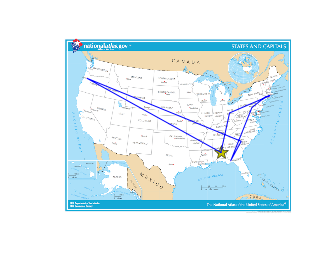

In [16]:
path=rand_path(8) #random of path with 8 cities 
show_path(path,path[0])

#### Pairwise Exchange
The pairwise function has been defined below. This function is used to shuffle the position of 2 cities in the randomly generated path in order to change the order. This is then used in the annealing algorithm in order to compare certain attributes of different path orders. 

In [17]:
def pairwise_exchange(path):
    path2=path.copy() 
    pos1=np.random.randint(len(path)) #chooses a random city in the path 
    pos2=np.random.randint(len(path)) #chooses another random city
    
    
    while pos1==pos2: #if the same city is chosen for each position, choose another city for position 1
        pos1=np.random.randint(len(path))
     
    path2[pos1],path2[pos2]=path2[pos2],path2[pos1] 
    #swap the positions of these to cities in the path to create the new path 
    
    return path2

In [18]:
path = rand_path(8)
print(path)


path2 = pairwise_exchange(path)
print(path2)


[('Salem', (80.0, 139.2)), ('Richmond', (673.2, 293.6)), ('Trenton', (698.8, 239.6)), ('Boise', (159.6, 182.8)), ('Indianapolis', (548.0, 272.8)), ('Phoenix', (179.6, 371.2)), ('Little Rock', (469.2, 367.2)), ('Madison', (500.8, 217.6))]
[('Salem', (80.0, 139.2)), ('Trenton', (698.8, 239.6)), ('Richmond', (673.2, 293.6)), ('Boise', (159.6, 182.8)), ('Indianapolis', (548.0, 272.8)), ('Phoenix', (179.6, 371.2)), ('Little Rock', (469.2, 367.2)), ('Madison', (500.8, 217.6))]


Above shows that the pairwise exchange function was successful in switching two cities around to create a new order for the path.

#### Path Length
The function below finds the length of the randomly generated path. This is done by using pythagoras. City 1 and City 2 are taken from the list, the change in horizontal component and vertical component are found, constructing a right angled triangle so that the hypotenuse can be calculated. This is the distance between the 2 cities. This process is then repeated for the 2nd and 3rd city in the list and so on until it has run through all the cities in the path, completing the loop.

In [22]:
def path_length(path):
    l = 0 #inialise the length
    route = list(path) + [path[0]] #closes the path so it returns to its original starting city 
    pair = zip(route, route[1:])
    for i,j in pair:
        
        h= (i[1][0])
        v= (i[1][1])
        h2= (j[1][0])
        v2= (j[1][1])
      
        distance= np.sqrt(((h - h2)**2) + ((v - v2)**2)) 
        #using pythagoras to find the distance between a pair of cities
        l = l + distance 
        
    return l 

In [23]:
path = rand_path(8)
path_length(path) # shows the path length of the randomly generated path with 8 cities 

2445.63399814489

#### Simulated Annealing


In [24]:
def annealing(α, t0, t, n):
    
    path = rand_path(n) #generate random path 
    print('Distance of original path : ', path_length(path))
    Distances=[]
    Temperatures=[]

    
    for i in range(t):
        
        exc_path = pairwise_exchange(path) #the same random path is now been switched to a different order 
        
        new_d = path_length(exc_path) #length of new path
        
        old_d = path_length(path) #length of originally generated random path
        Temp = temp_sched(α, t0,i)
        
        P = np.exp(-new_d/Temp)*np.exp(old_d/Temp) #probability distribution 

        
    
    
        if P >= random.uniform(0,1): #generates random number between 0 and 1 that determines if new path is accepted

            
            path = exc_path #if accepted the new path becomes the old path and the process is repeated
            Distances.append(new_d)
            Temperatures.append(Temp)
    
    
    show_path(path,path[0])
    plt.plot(Temperatures,Distances)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Temperatures")
    plt.ylabel("Distances")
    plt.autoscale(enable=True, axis='both', tight=None)
    plt.show()
    

    print('shorter path :',Distances[-1])    #prints the new distance of the shorter path 

Distance of original path :  801.148181339


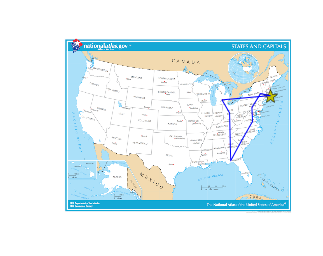

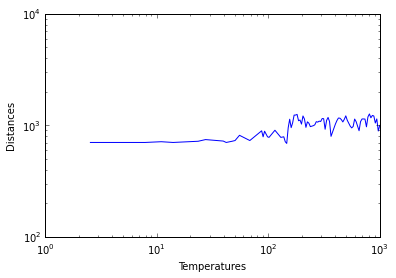

shorter path : 702.561748209
Distance of original path :  2247.8331445


/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: overflow encountered in exp
/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars


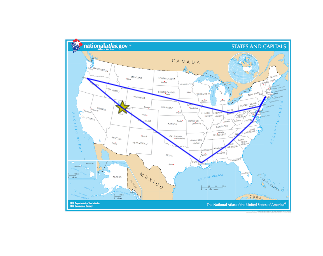

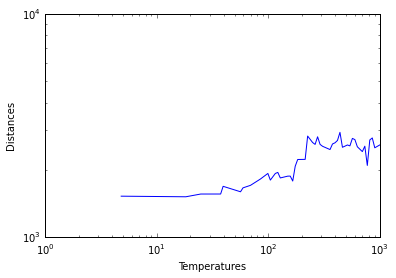

shorter path : 1522.89995411
Distance of original path :  2082.9353722


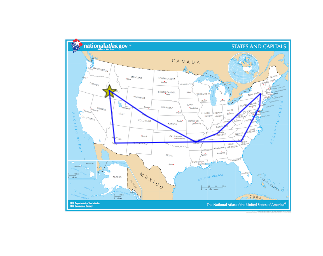

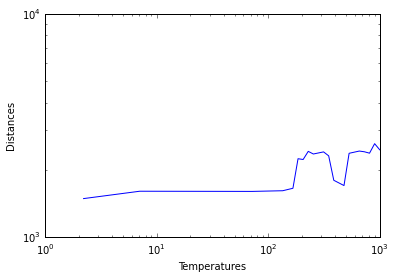

shorter path : 1485.45950319
Distance of original path :  2535.06085185


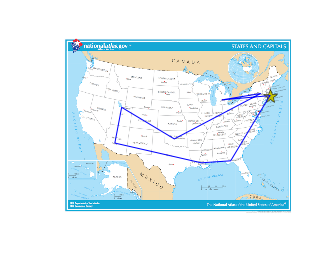

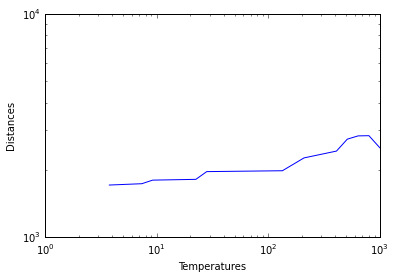

shorter path : 1708.39191375


In [25]:
annealing(0.97,1000,200,8)

annealing(0.95,1000,200,8)

annealing(0.9,1000,200,8)

annealing(0.8,1000,200,8)

Distance of original path :  5416.85852142


/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: overflow encountered in exp
/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars


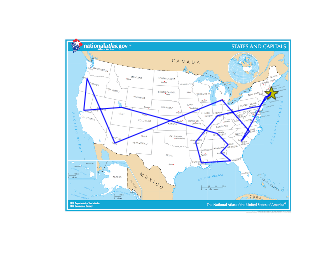

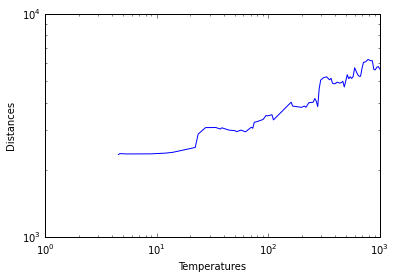

shorter path : 2341.49006035
Distance of original path :  8956.22012969


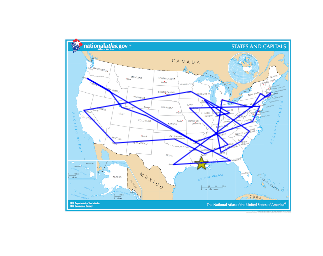

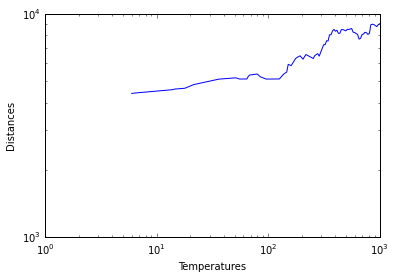

shorter path : 4396.84990742


In [26]:
annealing(0.97,1000,200,20) #test using original parameters for 20 cities

annealing(0.97,1000,200,len(capitals_list)) #test using original parameters for all the cities in 'capitals_list'

The graphs above clearly show that the distance of the path decreases over a period of iterations which means that the `annealing` function is working. 

#### FINDING THE BEST PARAMETERS 

The best parameters were found using trial and error. The indvidual parameters were modified and many different combinations were attempted in order to come to the set of parameters below. This could also have been possible by using nested for loops to change the parameters within a set range to give the best combination of parameters to achieve the shortest path however, this would have been too compuationally expensive.

Distance of original path :  8365.01227304


/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: overflow encountered in exp
/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars


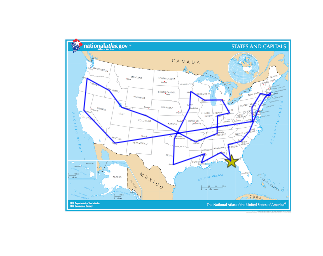

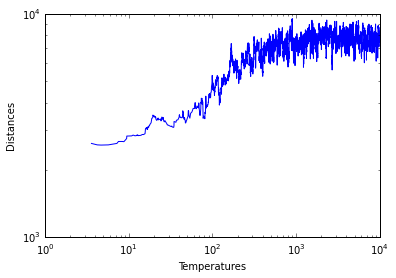

shorter path : 2624.47197375


In [27]:
annealing(0.999,10000,8000,len(capitals_list)) #this set of parameters achieved the shortest distance 

#### Shortest path 
Running the annealing function just once does not always give the shortest path possible due to an element of randomness. The function below repeats the `annealing` function with the most optimal parameters a set number of times. This would produce list of short distances meaning the absolute shortest distance from this list can be selected. 

In [28]:
def shortest_path(α, t0, t, N):
    path = rand_path(len(capitals_list)) #produce a random path of all the cities 
   
    Distances=[]
    Temperatures=[]
    paths=[]
    best_path=[]

    for j in range(N): #repeat the for loop below N times 
        for i in range(t): 
        # same as annealing function 
            exc_path = pairwise_exchange(path)
        
            new_d = path_length(exc_path)
        
            old_d = path_length(path)
            Temp = temp_sched(α, t0,i)
        
            P = np.exp(-new_d/Temp)*np.exp(old_d/Temp)

            if P >= random.uniform(0,1):
                path = exc_path
                Distances.append(new_d) #adds the newly improved distances to the empty list 
                Temperatures.append(Temp)
                paths.append(path)
    
    d_min = min(Distances)  #finds the lowest value in the Distances list 
    b = Distances.index(d_min) #finds the position of this distance in the list 
    best_path = paths[b] #finds the correspondig path to the shortest distance 
    
    show_path(best_path,best_path[0]) #shows the path of the 'shortest path'
    print('The distance of the shortest path obtained is',d_min) # prints the distance of the shortest path 

/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: overflow encountered in exp
/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in double_scalars


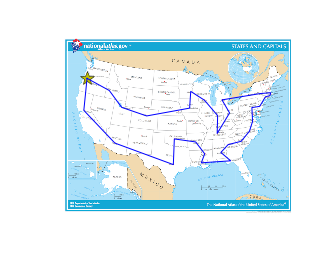

The distance of the shortest path obtained is 2213.51047796


In [29]:
shortest_path(0.999,10000,8000,20)

The function above repeats the optimal parameters 20 times and selects the shortest distance from this. The number of repeats could be increased to obtain more path lengths to choose from but it becomes too computationally expensive. 

### Longest path 

The longest path can be found by copying the `annealing` function previously stated and switching the direction of the probability inequality. This ensures that if the new path is longer than the original path, it will always be accepted.

In [30]:
def long(α, t0, t, n):
    
    path = rand_path(n) #generate random path 
    print('Distance of original path : ', path_length(path))
    Distances=[]
    Temperatures=[]

    
    for i in range(t):
        
        exc_path = pairwise_exchange(path) #the same random path is now been switched to a different order 
        
        new_d = path_length(exc_path) #length of new path
        
        old_d = path_length(path) #length of originally generated random path
        Temp = temp_sched(α, t0,i)
        
        P = np.exp(-new_d/Temp)*np.exp(old_d/Temp) #probability distribution 

        
    
    
        if P <= random.uniform(0,1): #generates random number between 0 and 1 that determines if new path is accepted

            
            path = exc_path #if accepted the new path becomes the old path and the process is repeated
            Distances.append(new_d)
            Temperatures.append(Temp)
    
    
    show_path(path,path[0])

    

    print('longer path :',Distances[-1])    #prints the new distance of the longer path 

Distance of original path :  8613.41101975


/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: overflow encountered in exp
/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars


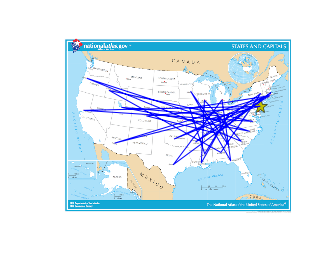

longer path : 10576.7690009


In [31]:
long(0.999,10000,8000,len(capitals_list))

Below shows the `longest_path` function. This function repeats the `long` function N times and retrieves this longest path and path length from the list of paths and distances created.

In [ ]:
def longest_path(α, t0, t, N):
    path = rand_path(len(capitals_list)) #produce a random path of all the cities 
   
    Distances=[]
    Temperatures=[]
    paths=[]
    best_path=[]

    for j in range(N): #repeat the for loop below N times 
        for i in range(t): 
        # same as annealing function 
            exc_path = pairwise_exchange(path)
        
            new_d = path_length(exc_path)
        
            old_d = path_length(path)
            Temp = temp_sched(α, t0,i)
        
            P = np.exp(-new_d/Temp)*np.exp(old_d/Temp)

            if P <= random.uniform(0,1):
                path = exc_path
                Distances.append(new_d) #adds the newly improved distances to the empty list 
                Temperatures.append(Temp)
                paths.append(path)
    
    d_max = max(Distances)  #finds the highest value in the Distances list 
    b = Distances.index(d_max) #finds the position of this distance in the list 
    best_path = paths[b] #finds the correspondig path to the shortest distance 
    
    show_path(best_path,best_path[0]) #shows the path of the 'longest path'
    print('The distance of the longest path obtained is',d_max) # prints the distance of the longest path 

In [ ]:
longest_path(0.999,10000,8000,20)

## CONCLUSION 

In conclusion, the natural frequency obtained from the investigation into the collapse of the Tacoma Bridge was 0.12Hz. The literature value for the natural frequency of the bridge was 0.2Hz [Tacoma Narrows Bridge Failure] which means the percentage difference between the calculated value and the literature value is 40%. This percentage difference is large enough to deem the investigation unsuccessful in determining the natural frequency of the bridge. This is not a surprise due to the simplistic nature of the model. The bridge was modelled in 2D instead of 3D to avoid complications in doing the calculations. Using this model would therefore disregard any forces acting in the horizontal direction which in reality is not the case. Furthemore, using a 2D model also does not properly acknowledge the structure of the bridge as well as the materials used and their material properties. If the investigation is repeated, it would be best to further dive into the causes of oscillations namely, aerodynamic and aeroelastic flutter, in order to give a better, more accurate expression for the driven force and therefore, we would be able to achieve a better estimate for the natural frequency of the bridge. 



The investigation into the Travelling salesperson problem was somewhat successful in creating a function that produces the shortest path possible from a set number of cities. The shortest path achieved was 2215.1046. Although the point of the algorithm is to avoid the use of the brute force method to find the shortest distance, it is still used when finding the most optimal parameters. This seems counter-intuative and inefficient as it goes against the purpose of the investigation. Computational methods could have been used to find these optimal parameters such as the use of nested for loops with varying ranges for each of the parameters, however, the run time for this becomes extremely long and the method becomes ineffecient. Moreover, the `shortest_path` function does not always generate the shortest path possible. This is due to the random nature of the function. Currently, the number repeats in the function is 20, increasing this number to 100 would more consistently produce the shortest path possible but this becomes immensely computationally expensive. 

Both problems have been immensely influential in the progression of physics and engineering. The collapse of the Tacoma bridge caused engineers to rethink the structural design of the bridges. With years of research into aerodynamics, and the new mathematical knowledge of vibrations and wave phenomena, a new era of more stable suspension bridges was created. The TSP algorithm is used globally by couriers, providing great financial benefit by creating the shortest path possible, thus greatly limiting the fuel cost of these companies. 

Below is the shortest path and distance which the function could produce after a numerous number of repeats. 
<div> <img src="shortest_distance.png"<div>

## REFERENCES

Tacoma Narrows Bridge collapses (2009) History.com. A&amp;E Television Networks. Available at: https://www.history.com/this-day-in-history/tacoma-narrows-bridge-collapses (Accessed: January 22, 2023). 

NP-hard problem (no date) from Wolfram MathWorld. Available at: https://mathworld.wolfram.com/NP-HardProblem.html (Accessed: January 22, 2023).

Bond, P. (2022) Vortex shedding 101: What is it &amp; why does it matter?, Pi Engineering. Available at: https://www.piengineering.ca/blog/vortex-shedding-101/ (Accessed: January 22, 2023). 

Tacoma Narrows Bridge Failure (no date) enDAQ. Available at: https://endaq.com/pages/tacoma-narrows-bridge-failure (Accessed: January 22, 2023). 

Cummings, N. (2000) Home, The OR Society. Available at: https://www.theorsociety.com/about-or/or-methods/heuristics/a-brief-history-of-the-travelling-salesman-problem/ (Accessed: January 22, 2023). 

P.J. McKenna and C.O Tuama, Amer. Math. Monthly 108, 738 (2001)

Baird, L. (no date) Simulated annealing&nbsp;, What is Simulated Annealing? Available at: https://www.cs.cmu.edu/afs/cs.cmu.edu/project/learn-43/lib/photoz/.g/web/glossary/anneal.html (Accessed: January 22, 2023). 

Harmonic motion (no date) Harmonic motion 3. Available at: https://www.ippp.dur.ac.uk/~krauss/Lectures/NumericalMethods/Oscillator/Lecture/os3.html (Accessed: January 22, 2023). 

A brief introduction to numerical methods for Di Erential ... - lehman (2011). Available at: https://lehman.edu/academics/cmacs/documents/NumericalIntegrationTutorial.pdf (Accessed: January 22, 2023). 

Euler-cromer method (no date) Computational Methods of Physics. Available at: https://www.physics.udel.edu/~bnikolic/teaching/phys660/numerical_ode/node2.html (Accessed: January 22, 2023). 

Tietz, T. (2020) The Broughton Suspension Bridge and the Resonance Disaster, SciHi Blog. Available at: http://scihi.org/broughton-suspension-bridge-resonance-disaster/ (Accessed: January 22, 2023). 

Explaining why the millennium bridge wobbled- Cornell University (2005) ScienceDaily. ScienceDaily. Available at: https://www.sciencedaily.com/releases/2005/11/051103080801.htm (Accessed: January 22, 2023). 